***Exercise 7-1***

In [1]:
# Import necessary libraries 
import numpy as np
import pandas as pd
import thinkstats2
import thinkplot
import first

In [16]:
# Copy functions over from the book

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [3]:
# Run code given to being exercise
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

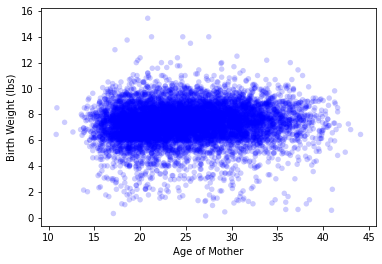

In [10]:
# Plot a scatter plot of birth weight versus mother's age
thinkplot.Scatter(live.agepreg, live.totalwgt_lb, alpha=0.2)
thinkplot.Config(xlabel='Age of Mother',
                 ylabel='Birth Weight (lbs)')

In [12]:
# The scatter plot shows that birth weight doesn't really change with age, but it is saturated which makes it hard
# to really see what's going on, so now I want to plot the percentiles of birth weight for a range of Age bins. To 
# do this, I must first bin the data and group the data into the bins.

bins = np.arange(10, 45, 5)
indices = np.digitize(live.agepreg, bins)
groups = live.groupby(indices)

In [13]:
# Here are the number of observations in each group
for i, group in groups:
    print(i, len(group))

1 58
2 1852
3 2962
4 2336
5 1393
6 401
7 36


In [14]:
# The cdf is needed to compute percentiles, so now we compute the cdf of birth weight within each group
mean_ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

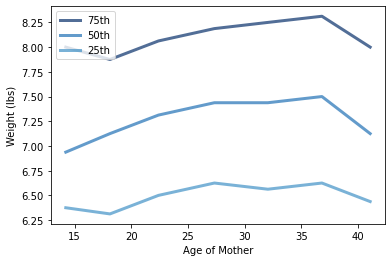

In [15]:
# Finally we can plot the percentiles of weight vs age
for percent in [75, 50, 25]:
    weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_ages, weight_percentiles, label=label)
    
thinkplot.Config(xlabel='Age of Mother',
                 ylabel='Weight (lbs)')

In [17]:
# It does look like there is a slight increase in birth weigths in all percentiles from about the age of 18 to 38.
# Let's calculate the correlation coefficient of these two variables. 
Corr(live.agepreg, live.totalwgt_lb)

0.06883397035410904

In [18]:
# The results for Pearson's correlation are very low (.07) which indicates very little correlation, but Pearson's 
# correlation results are affected by outliers and the type of relationship the variables have, so let's use 
# Spearman's rank correlation since it is more robust. 
SpearmanCorr(live.agepreg, live.totalwgt_lb)

0.09461004109658226

In [ ]:
# It's slightly higher, but still really close to zero. I would say that these two variables have a very weak correlation. 

***Exercise 8-1***

In [1]:
# Import necessary libraries
import numpy as np
import thinkstats2
import thinkplot
import random

In [2]:
# Copy functions over from the book

def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def MeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [10]:
# Tweeked this function to check if sample mean and median are biased estimates of mean

def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.mean(xs)
        unbiased = np.median(xs)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error for mean', MeanError(estimates1, sigma**2))
    print('mean error for median', MeanError(estimates2, sigma**2))

In [11]:
Estimate2()

mean error for mean -0.9979362335903996
mean error for median -0.9880896503741063


In [19]:
# Both of those mean errors are really close to 1, so it doesn't appear that they are biased. 
# Tweeked this function so that it shows the MSE for S2 and S2/n-1

def Estimate1(n=7, iters=1000):

    mu = 0
    sigma = 1

    s2_values = []
    sampleVar_values = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        s2 = np.var(xs)
        sampleVar = np.var(xs, ddof=1)
        s2_values.append(s2)
        sampleVar_values.append(sampleVar)

    print('Experiment 2')
    print('rmse s2', RMSE(s2_values, mu))
    print('rmse sampleVar', RMSE(sampleVar_values, mu))

In [20]:
Estimate1()

Experiment 2
rmse s2 0.9729994421644588
rmse sampleVar 1.1351660158585353


In [ ]:
# The biased estimator for s2 yields a lower RMSE than the unbiased estimator. 

***Exercise 8-2***

In [34]:
# Import necessary libraries
import numpy as np
import thinkstats2
import thinkplot
import random
import matplotlib.pyplot as plt

In [30]:
# Copy functions over from the book and change the values in the second function to provide what the exercise is requesting.
# Changed value for n, added calculating the cdf from the list of means, added calculating ci and stderr, added plotting, 
# changed what is being printed.

def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def Estimate3(n=10, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)
    cdf = thinkstats2.MakeCdfFromList(means)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    stderr = RMSE(means, lam)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')
    
    print('Confidence Interval:', ci)
    print('Standard Error:', stderr)

Confidence Interval: (1.282918242916269, 3.786768628039874)
Standard Error: 0.8737380367028085


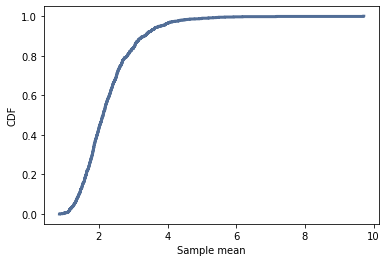

In [28]:
# Call the function as is
Estimate3()

Confidence Interval: (1.5265496774409644, 2.7711164064902474)
Standard Error: 0.39104348197021294


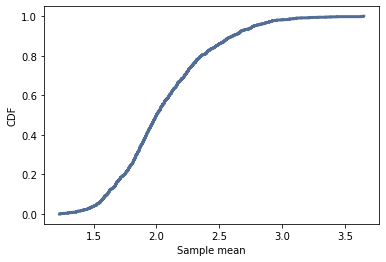

In [31]:
# Call the function with several different values for n
Estimate3(n=20)

Confidence Interval: (1.4954654388385473, 2.7999176725793116)
Standard Error: 0.40952688948666255


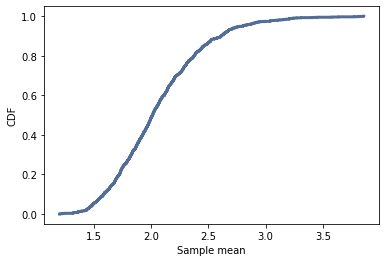

In [32]:
Estimate3(n=30)

Confidence Interval: (1.5850894077759978, 2.5934713303533736)
Standard Error: 0.3105264415084874


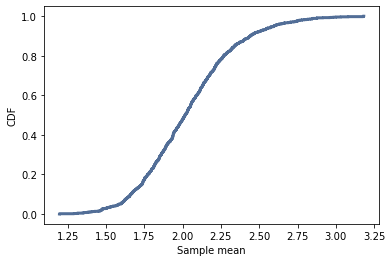

In [33]:
Estimate3(n=40)

In [36]:
# Create lists of the variables to be plotted that contain the n values and corresponding standard errors
n = [10, 20, 30, 40]
stderr = [0.8737380367028085, 0.39104348197021294, 0.40952688948666255, 0.3105264415084874]

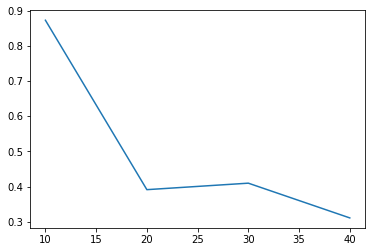

In [37]:
# Plot the standard error versus n
plt.plot(n, stderr)

In [ ]:
# It appears that as the number of observations increases, the standard error decreases.